<a href="https://colab.research.google.com/github/maruwrks/Deep-Learning-Task/blob/main/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training and Visualizing Decision Tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
%pip install graphviz
import graphviz # Often used for rendering the .dot file

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [2]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

##Predictions

In [3]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [4]:
tree_clf.predict([[5, 1.5]])

array([1])

##Hyperparameters

### Plotting decision boundaries for a regularized tree

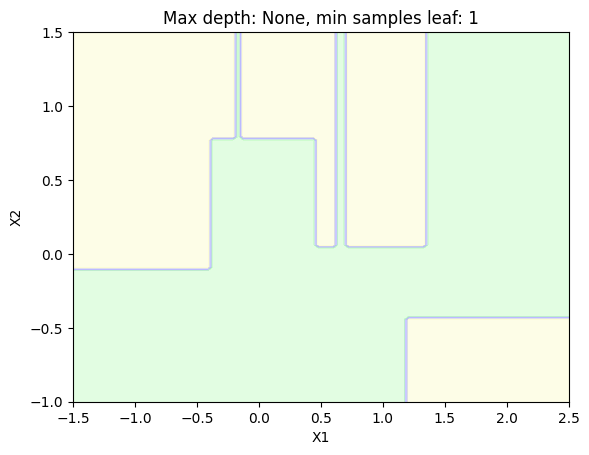

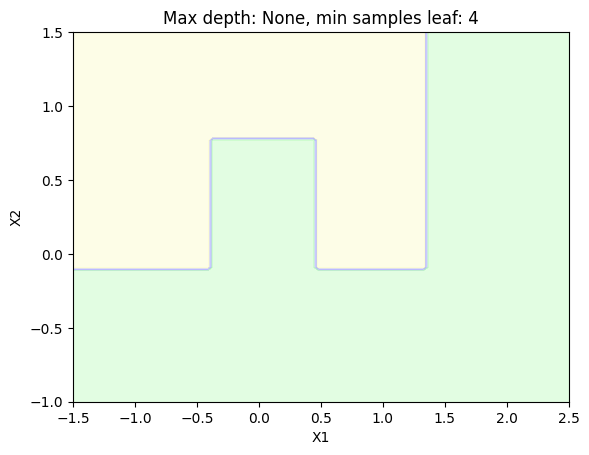

In [5]:
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "y.", label="Class 0")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "b.", label="Class 1")
    if legend:
        plt.legend(loc="lower right")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(f"Max depth: {clf.max_depth}, min samples leaf: {clf.min_samples_leaf}")
    plt.axis(axes)
    plt.show()

plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], plot_training=False)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], plot_training=False)

##Regression with Decision Trees


### Creating some noisy quadratic data


In [6]:
X = np.random.rand(100, 1) * 6 - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

### Training a DecisionTreeRegressor

In [7]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [8]:
export_graphviz(
    tree_reg,
    out_file="regression_tree.dot",
    feature_names=["X"],
    rounded=True,
    filled=True
)

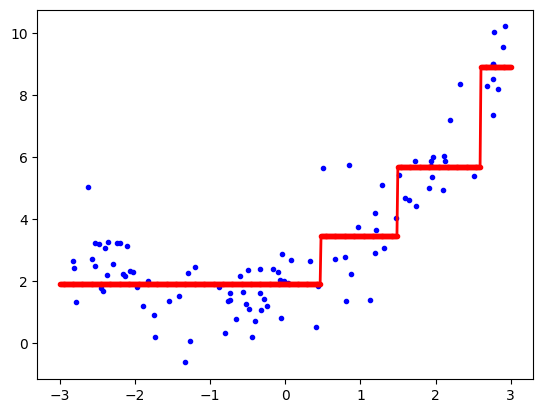

In [9]:
x1 = np.linspace(-3, 3, 500).reshape(-1, 1)
y_pred = tree_reg.predict(x1)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred, "r.-", linewidth=2, label="predictions")
plt.show()

### Regressor with different max_depth

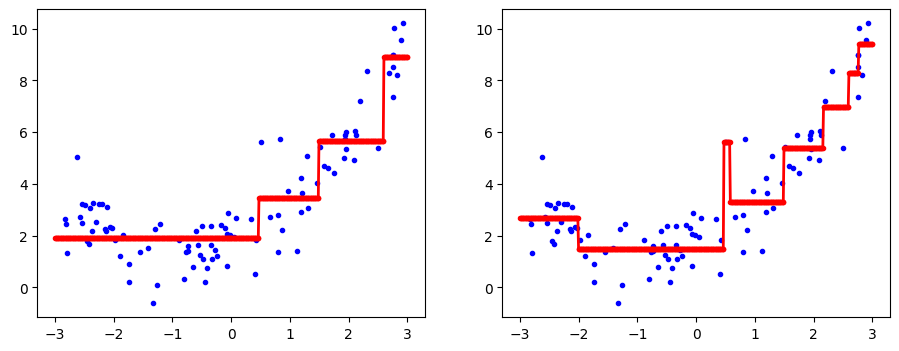

In [10]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(-3, 3, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)
plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label="max_depth=2")
plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label="max_depth=3")
plt.show()